# DTSA 5510 - Unsupervised Algorithms in Machine Learning Final Project

-----

## Contents
1. Introduction
2. EDA
3. Modeling
4. Results
5. Conclusion


------
###  1. Introduction
This is the final project for the Unsupervised Algos in ML module. Throughout this course we've been introduced to the paradigm of unsupervised learning. For this project we're tasked to perform an exploratory data analysis, implent data modeling with an unsupervised learning algorithm, and communicate our results. 


For this project I will be using the [Pima Indians Diabetes Dataset](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database) found on Kaggle. The dataset contains diagnostic measurments of females above 21 years old. It has the following features, 'numberOfPregnancies', 'BMI', 'insulinLevel', 'age', etc. The goal is to predict whether the patient has diabetes or not.

For this classification task I will be using the KMeans algorithm which is a type of unsupervised learning used to cluster points of data, and then I will be comparing the results against a supervised model, specifically the K-Nearest Neighbors algorithm.  

-------
### 2. EDA


In [2]:
#Basic Imports
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Here we import the dataset, and print the first five rows.

In [3]:
diabetes = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


We can see from the output above that the target variable is 'Outcome' and it is a binary boolean class.

In [4]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From the summary statistics in the output above, we can see that the following columns "Glucose","BloodPressure","SkinThickness","Insulin",and "BMI" have minimum value of 0, this doesn't make sense in the context of our data, and what it really means is that these rows contain missing values, for the puspose of this task I will replace those 0 values, with NaN.




array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

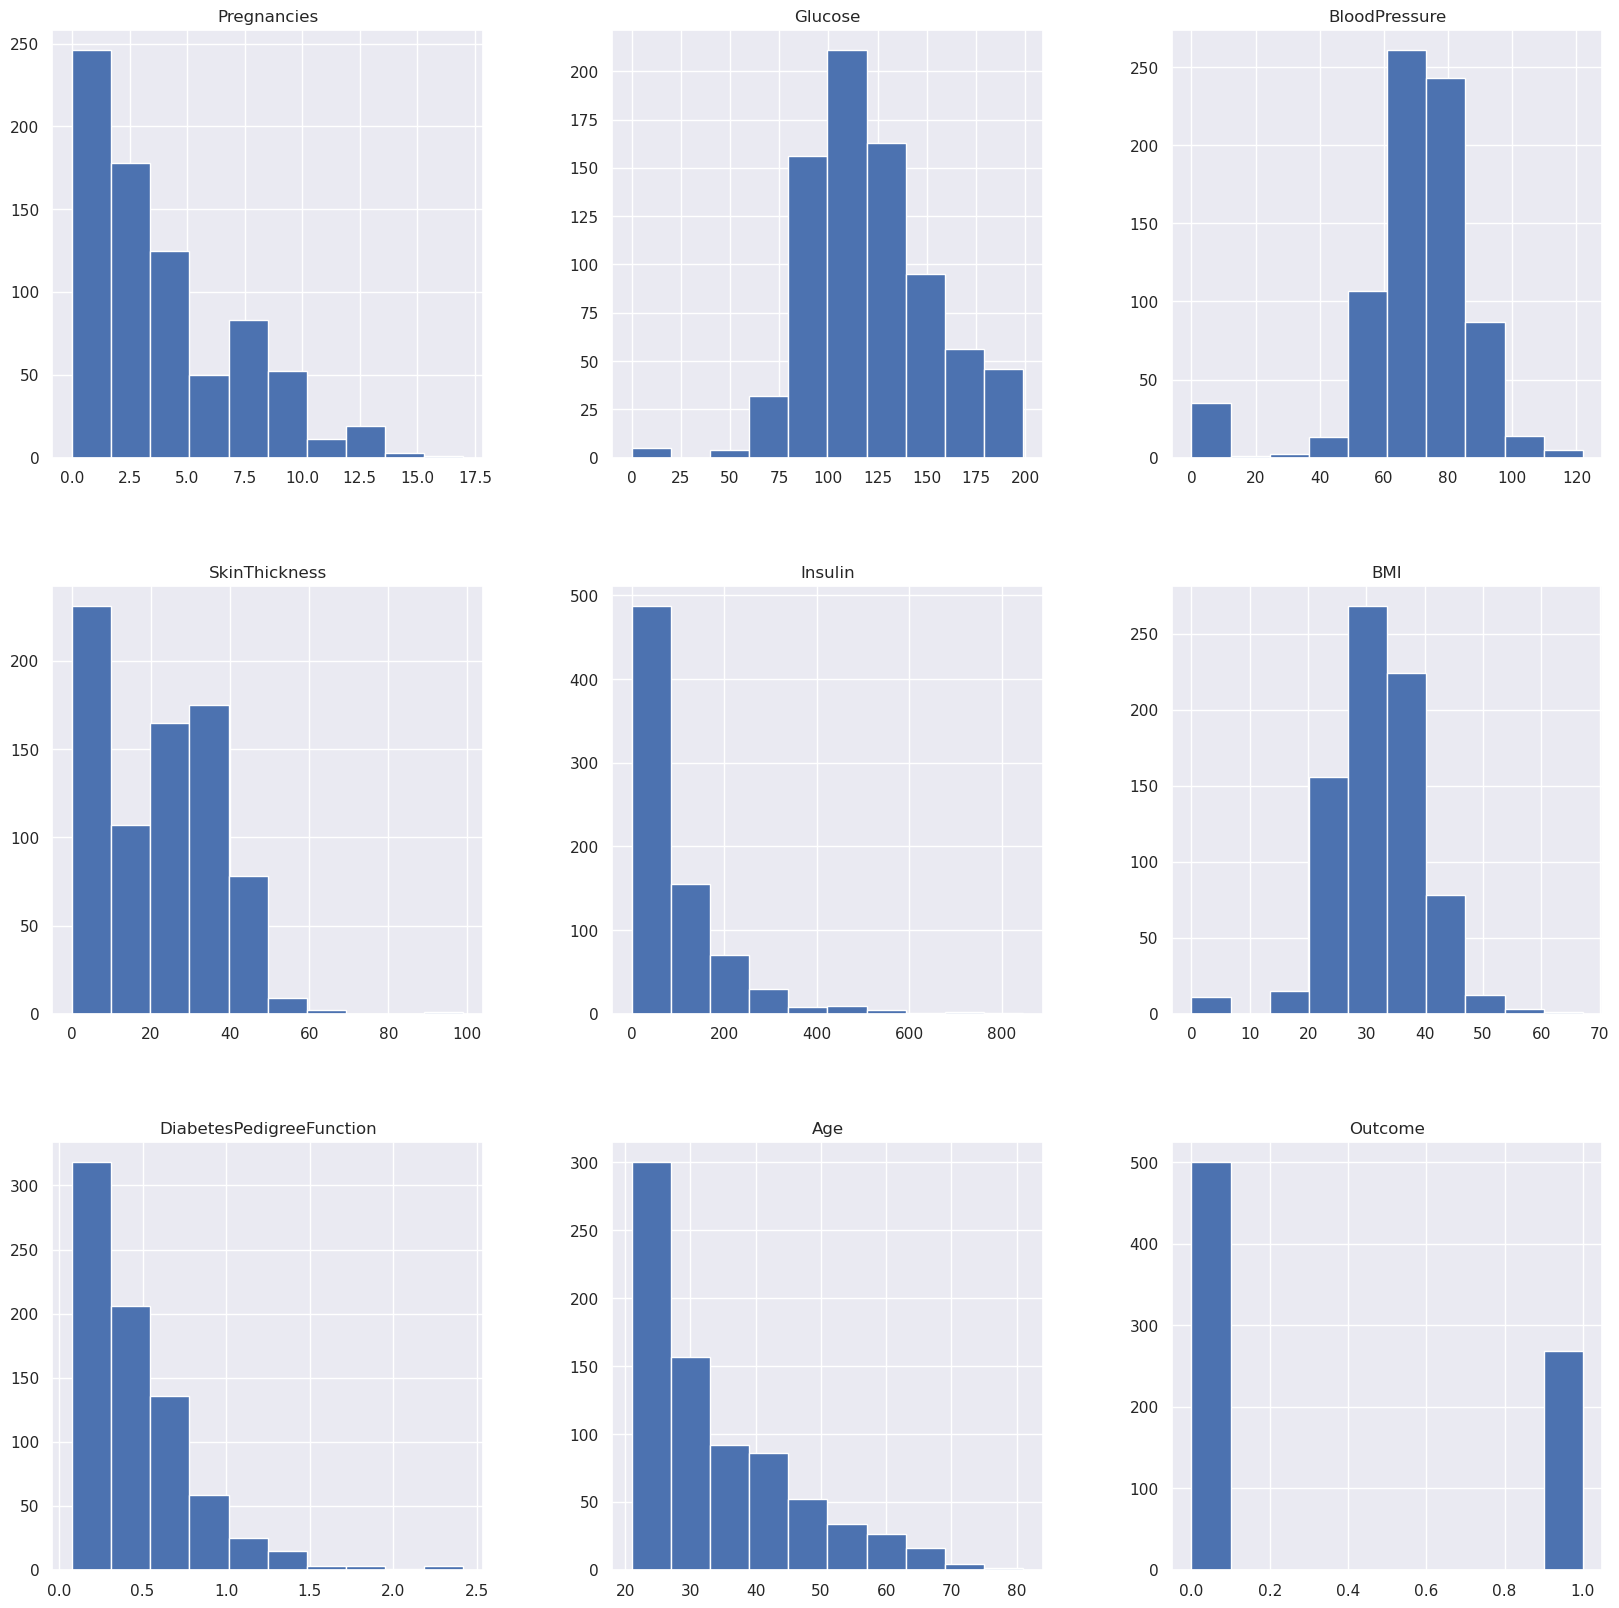

In [5]:
diabetes.hist(figsize = (20,20))

Now that we have a better idea of the different distributions of values for each feature, let's replace the 0's found in the columns mentioned before with NaN. Then print the number NaN values per column.

In [6]:
diabetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
print(diabetes.isnull().sum())
print('\n\nThe number of rows is '+ str(len(diabetes)))

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


The number of rows is 768


We can see that there are two columns, "BloodPressure" and "Insulin" that have quite a large number missing values, if we opted for removing the rows with missing values we would be losing a lot of data, therefore we need to come up with a strategy to assing an appropiate value for each.

Below I impute the missing values.

In [7]:
diabetes['BloodPressure'].fillna(diabetes['BloodPressure'].mean(), inplace=True)
diabetes['Insulin'].fillna(diabetes['Insulin'].median(), inplace=True)
diabetes['BMI'].fillna(diabetes['BMI'].median(), inplace=True)
diabetes['Glucose'].fillna(diabetes['Glucose'].mean(), inplace=True)
diabetes['SkinThickness'].fillna(diabetes['SkinThickness'].median(), inplace=True)


Below we plot the histogram for the values for each feature, after dealing with missing values.

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

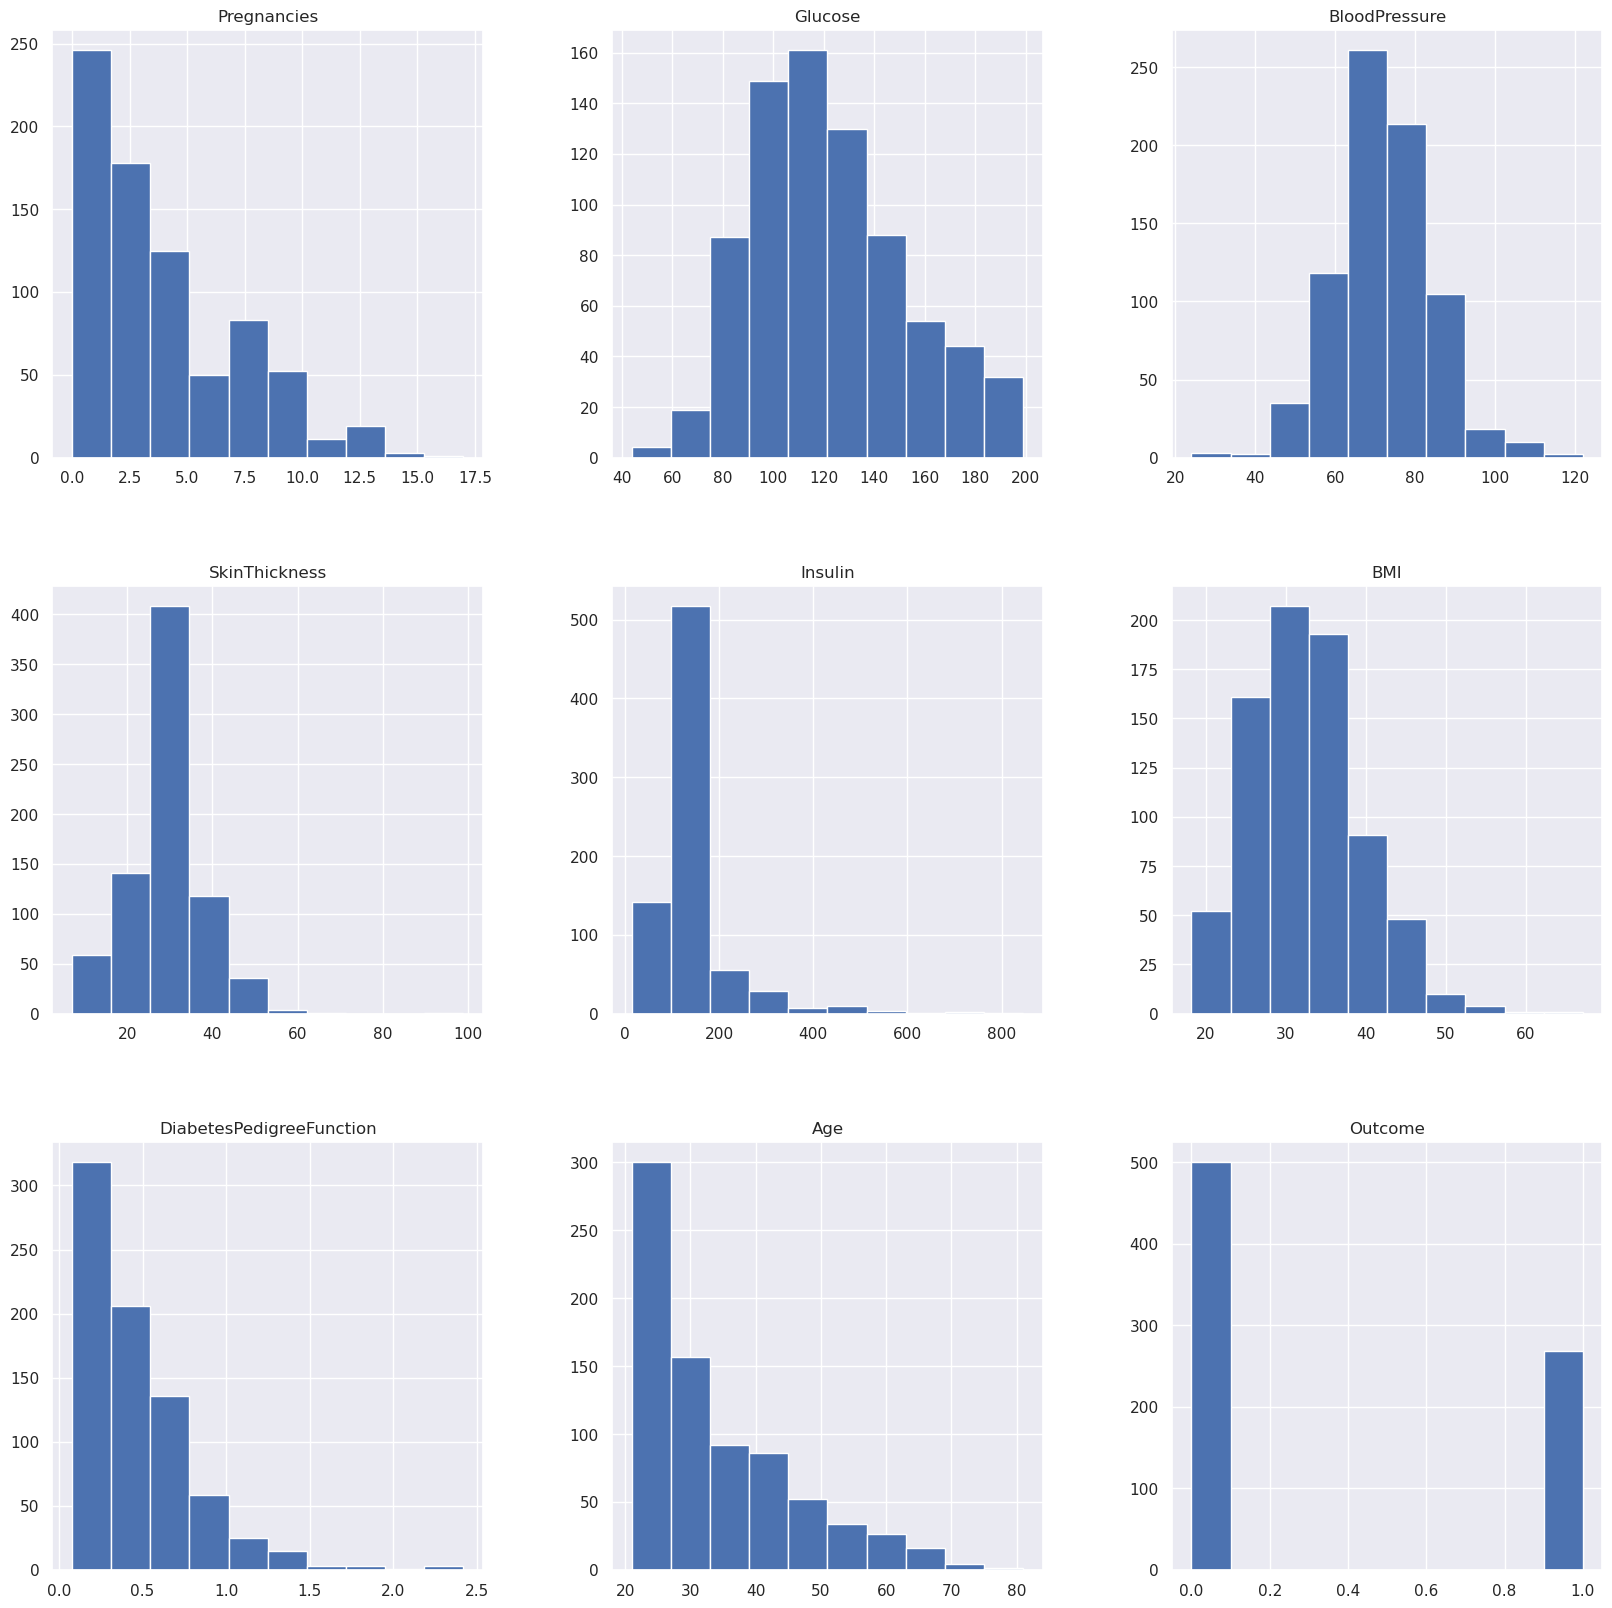

In [8]:
diabetes.hist(figsize = (20,20))

In [9]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


From the output above we can see now that the dataset doesn't contain missing values anymore. 

0    500
1    268
Name: Outcome, dtype: int64


<AxesSubplot:>

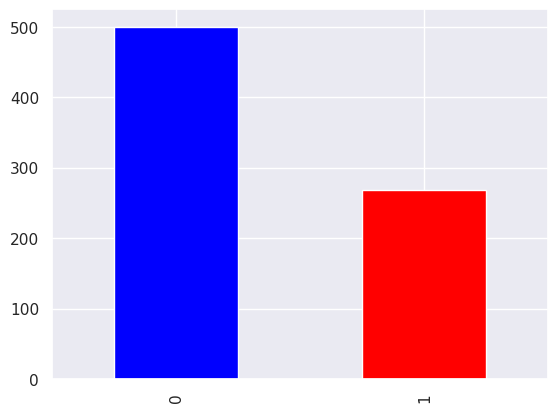

In [10]:
print(diabetes.Outcome.value_counts())
diabetes['Outcome'].value_counts().plot(kind="bar",color=['blue', 'red'])


From the above plot we can see that the classes are imbalanced, the number of observations where the Outcome is 0/negative, is 500. Almost twice as much the number of observations for which the Outcome is 1/positive. 

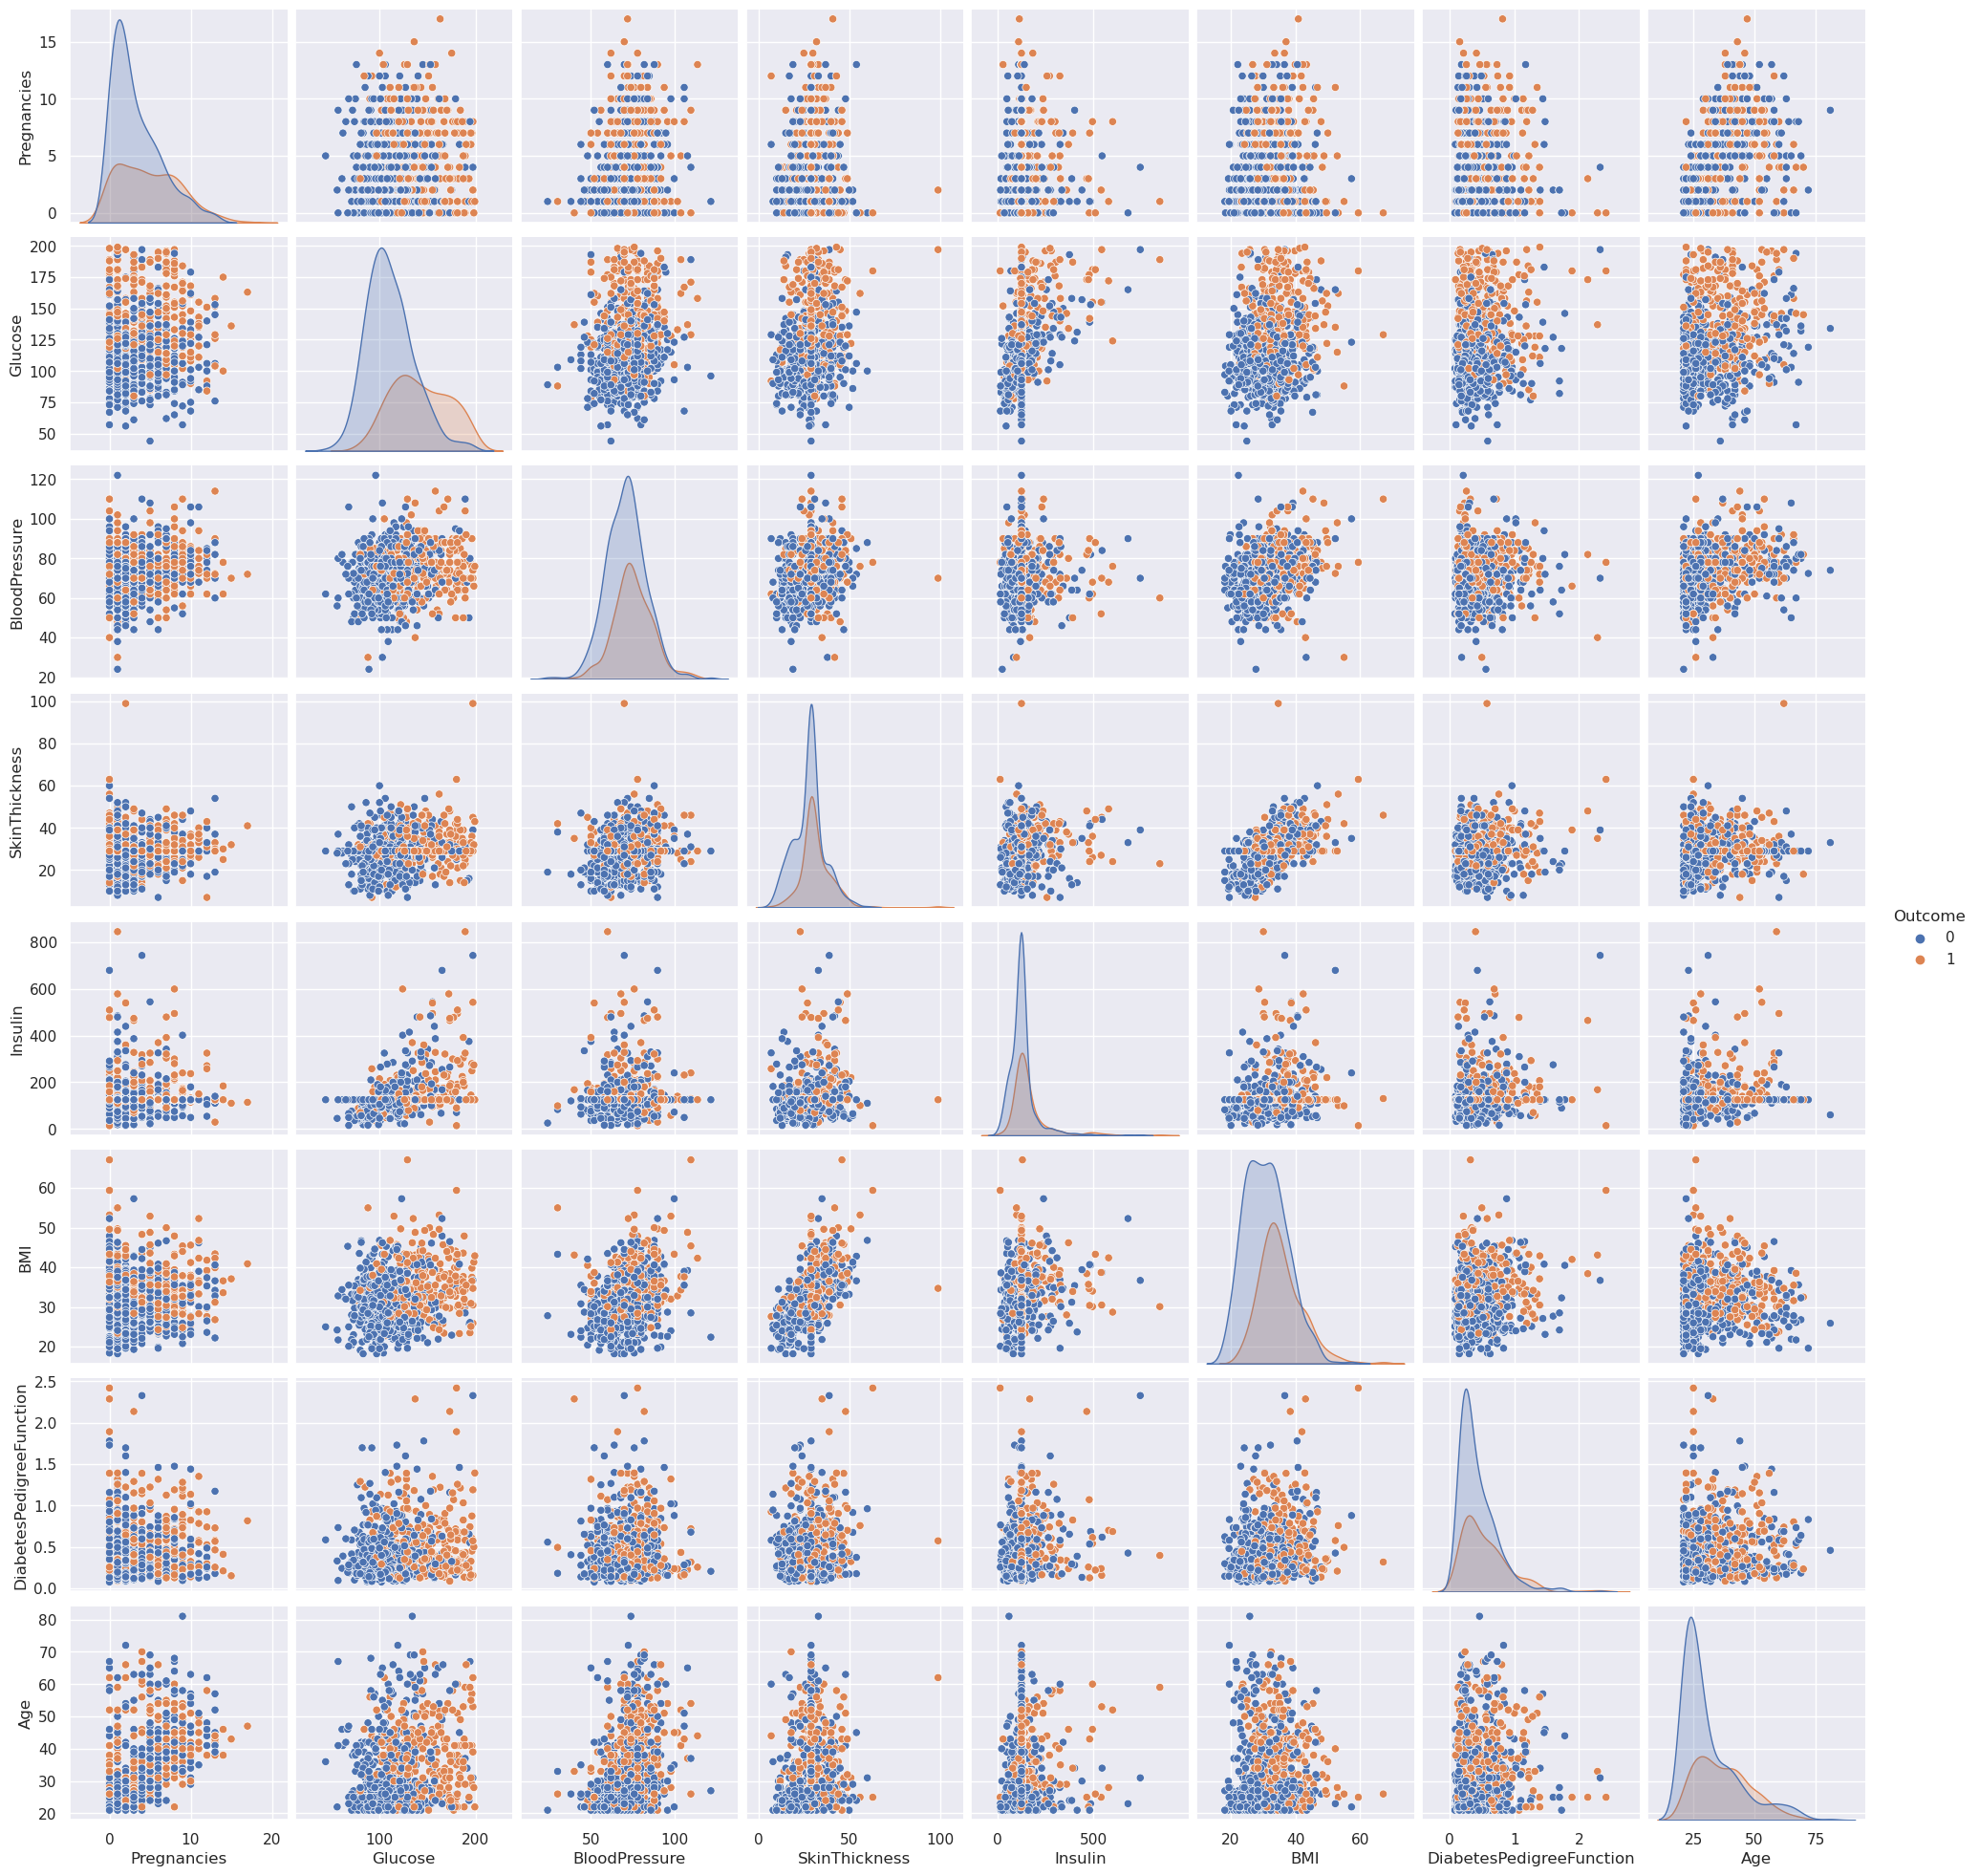

In [11]:
#Pairplot
sns.pairplot(diabetes, hue = 'Outcome')

In the plot above we can see the relationships between two variables. On the diagonal we can see, a smothed univariate histogram,  for both classes 0 and 1, the former being a negative diagnosis for diabetes, and the latter a positive diagnosis outcome. 

<AxesSubplot:>

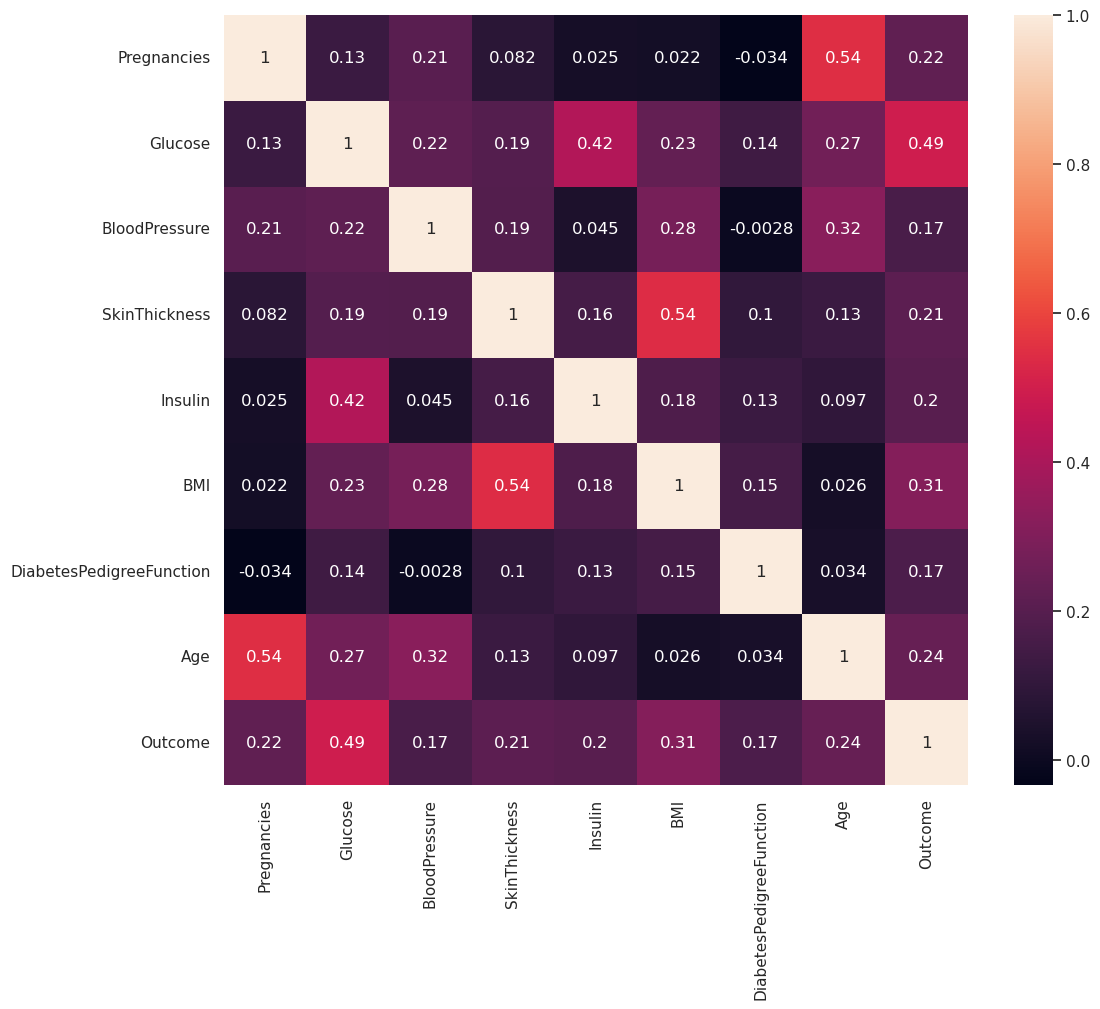

In [12]:
plt.figure(figsize=(12,10))
sns.heatmap(diabetes.corr(), annot=True)  

Above we can see the correlation matrix, from which we can se that the feature that has the strongest correlation with the target variable is 'Glucose', followed by 'BMI', and 'Age'. 

-------
### 2. Modeling

Before I proceed to split the train and test sets, I will perform data scaling to produce better results. 

In [13]:
StandardScaler = StandardScaler()
X = pd.DataFrame(StandardScaler.fit_transform(diabetes.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [14]:
y = diabetes["Outcome"]
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


We now have a rescaled dataset, it is time to split the data in training and test sets. 

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=11, stratify=y)

#### Training

Here I will create a for loop to find the best number number of nearest neighbors that yields the best results on the test set. 

In [16]:
test_candidate_scores = []
train_scores = []

for i in range(1,15):
    knn_model = KNeighborsClassifier(i)
    knn_model.fit(X_train,y_train)
    
    train_scores.append(knn_model.score(X_train,y_train))
    test_candidate_scores.append(knn_model.score(X_test,y_test))

In [17]:
max_train_score = max(train_scores)
train_scores_index = [idx for idx, score in enumerate(train_scores) if score == max_train_score]
print('The highest accuracy score for the training set was {} % with k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_index))))

The highest accuracy score for the training set was 100.0 % with k = [1]


In [18]:
max_test_score = max(test_candidate_scores)
test_scores_index = [idx for idx, score in enumerate(test_candidate_scores) if score == max_test_score]
print('The highest accuracy score for the training set was {} % with k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_index))))

The highest accuracy score for the training set was 79.22077922077922 % with k = [7, 13]


Let's visualize the different scores obtained for different values of K. 

<AxesSubplot:xlabel='K', ylabel='Scores'>

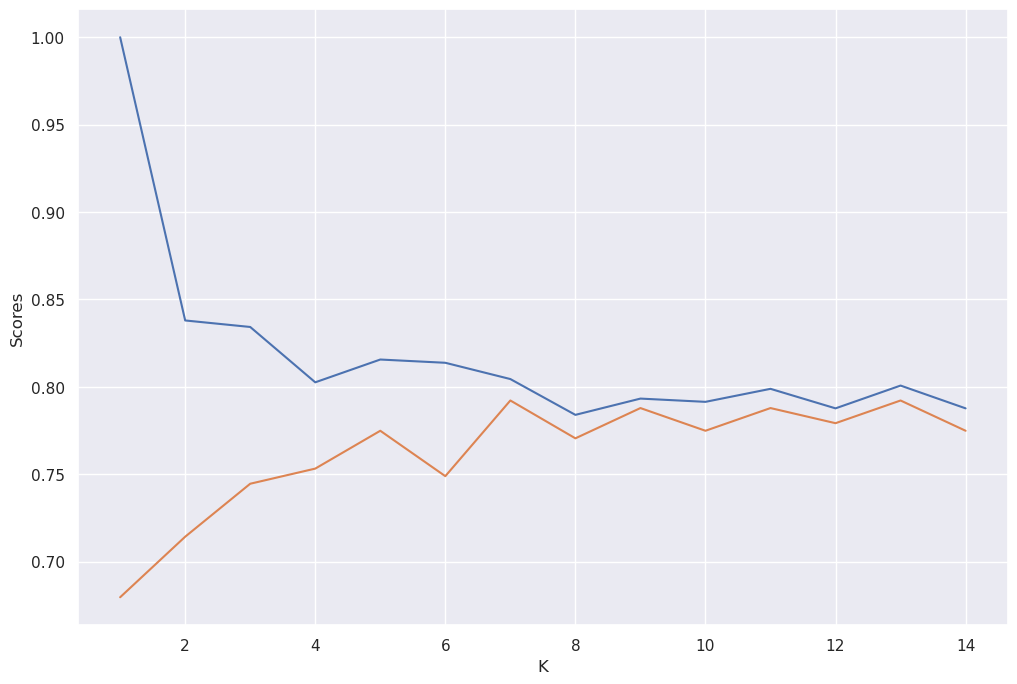

In [19]:
train_scores_df = {"Scores": train_scores, "K":list(range(1,15))}
train_scores_df = pd.DataFrame(train_scores_df)
test_scores_df = {"Scores": test_candidate_scores, "K":list(range(1,15))}
test_scores_df = pd.DataFrame(test_scores_df)

plt.figure(figsize=(12,8))
sns.lineplot(train_scores_df ,x="K", y="Scores")
sns.lineplot(test_scores_df ,x="K", y="Scores")

The best result was given by K = [7,13]. So we will settle on K=7. 

Now let's proceed to build our final model.

In [20]:
knn_model = KNeighborsClassifier(7)

knn_model.fit(X_train,y_train)
knn_model.score(X_test,y_test)

0.7922077922077922

---------
### 4. Results

#### Confusion Matrix

In [21]:
y_pred = knn_model.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,130,20,150
1,28,53,81
All,158,73,231


Text(0.5, 19.049999999999997, 'Predicted')

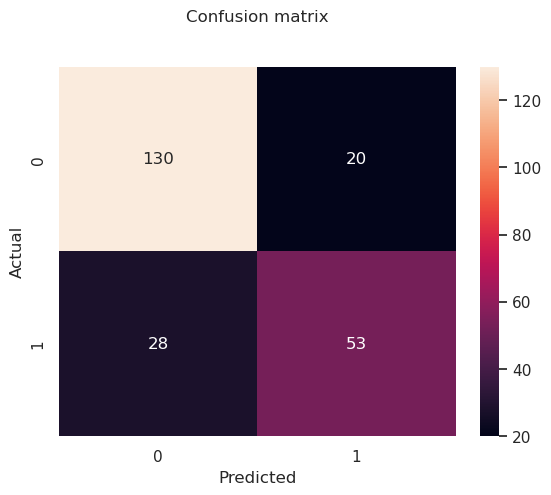

In [22]:
m = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(m), annot=True ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

#### Classification Report

In [23]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       150
           1       0.73      0.65      0.69        81

    accuracy                           0.79       231
   macro avg       0.77      0.76      0.77       231
weighted avg       0.79      0.79      0.79       231



#### ROC / AUC

In [24]:
y_pred_prob = knn_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

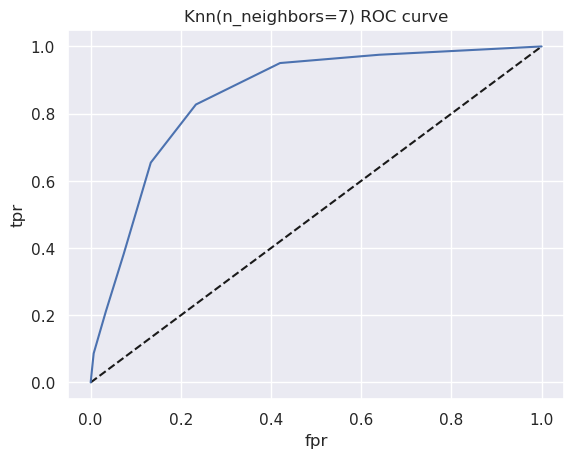

In [25]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [26]:
roc_auc_score(y_test,y_pred_prob)

0.8546090534979424

The ROC is a measure of how well the model can spararate classes. An ROC AUC closer to 1 indicates better performance, for our purposes our our ROC Score was 0.85. 

#### Unsupervised KMeans implementation

In [55]:
kmeans_model = KMeans(init="random", n_clusters=2, n_init=10, max_iter=300, random_state=11)
y_pred = kmeans_model.fit_predict(diabetes)

In [59]:
n_correct_predictions = 0
for i in range(diabetes.shape[0]):
    if diabetes["Outcome"][i] != y_pred[i]:
        n_correct_predictions += 1
print("Accuracy for kmeans:" +str(n_correct_predictions/diabetes.shape[0]))


Accuracy for kmeans:0.6536458333333334


------
### 5. Conclusion

We learned about the different features present in the diabetes dataset, we performed an exploratory data analysis in order to build intuition and get familiar with the data. We dealt with missing values, scaled the data, and used an unsupervised and supervised learning algorithm to make predictions and classify observations.

At the end with we 79% accuracy with KNN, whereas we only achieved 65% accuracy with KMeans. I believe a supervised learning approach proved to be superior for this problem, however unsupervised learning is very useful when we don't know in advance the labels of the classes. 

I am satisfied with the results, having in mind that this dataset only has 768 observations, with more data we could maybe achieve a higher accuracy or try different architectures and models.

Machine Learning has great potential to improve lives, this use case "diabetes diagnosis" is particularly interesting and I believe millions of people can reap benefits of solutions that make use of ML to monitor, detect or treat this and other diseases.